## Employee Clustering - K-Means Clustering Notebook

### Introduction
Employee engagement and work behavior are critical indicators of productivity.
In this analysis, we use **K-Means Clustering** to segment employees into meaningful groups based on:
- **JobRate** (performance rating)
- **SickLeaves** (absenteeism due to illness)
- **UnpaidLeaves** (leave frequency)
- **OvertimeHours** (extra hours worked)

Understanding these clusters helps in identifying patterns in employee performance, engagement, and workload.

### Key Objectives:
- Identify whether high-rated employees take more or fewer unpaid leaves.
- Assess if high overtime is linked to higher performance ratings.
- Recognize different work engagement patterns across employees.

### Steps in this Notebook:
- Load and explore the dataset
- Preprocess the data (standardization)
- Apply K-Means Clustering
- Evaluate and visualize the clusters
- Summarize findings and interpretations

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Step 1: Load the Data

The dataset contains employee performance and demographic details.
We will cluster employees based on engagement and work behavior metrics.

In [6]:
df = pd.read_csv(r"C:\Users\19024\Desktop\Intro to Data Science\Employees_clean.csv")

Step 2: Data Preprocessing

Selecting relevant features to capture employee engagement and work productivity.

In [7]:
features = ['JobRate', 'SickLeaves', 'UnpaidLeaves', 'OvertimeHours']
X = df[features]

Step 3: Standardizing the Data

Since `JobRate`, `UnpaidLeaves`, and `OvertimeHours` have different scales, we use **StandardScaler**
to transform all features onto a similar scale. This ensures that clustering is not biased by large values.

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Step 4: Finding Optimal Clusters Using the Elbow Method

The Elbow Method helps determine the best number of clusters by analyzing WCSS.

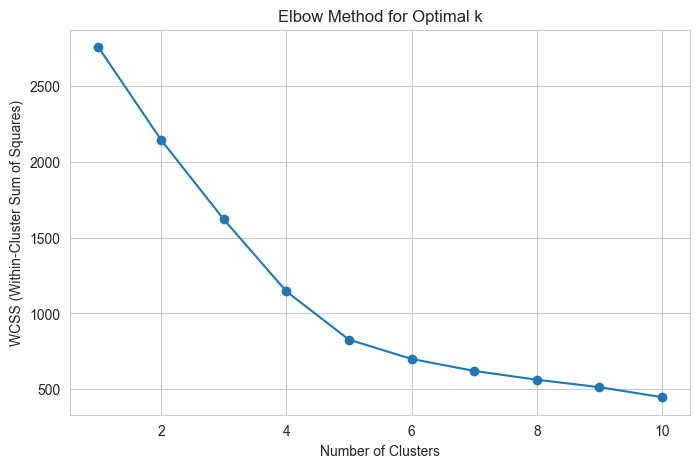

In [9]:
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()

Step 5: Applying K-Means Clustering

Based on the Elbow Method, we choose k=3 as the optimal number of clusters.

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

Step 6: PCA for Visualization

Since our dataset is multi-dimensional, **Principal Component Analysis (PCA)** reduces it to two dimensions for better visualization.
PCA does **not** affect clustering results but helps in visually interpreting the clusters.

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

Step 7: Visualizing the Clusters

We plot the clusters in a two-dimensional space using the PCA results.

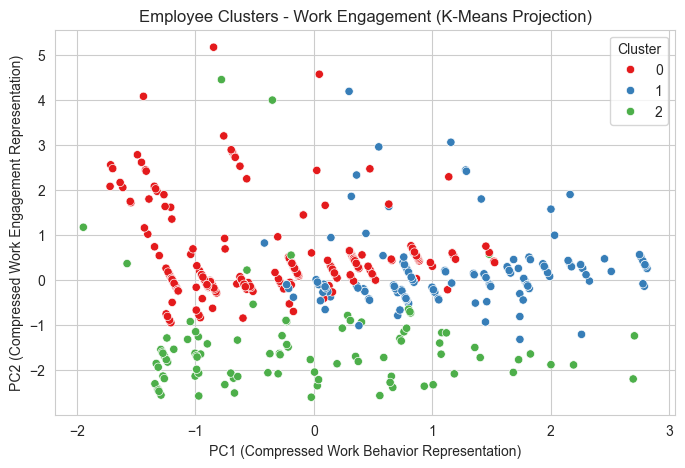

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set1')
plt.title('Employee Clusters - Work Engagement (K-Means Projection)')
plt.xlabel('PC1 (Compressed Work Behavior Representation)')
plt.ylabel('PC2 (Compressed Work Engagement Representation)')
plt.legend(title='Cluster')
plt.show()

Step 8: Cluster Analysis

Understanding how different metrics vary per cluster.

In [13]:
cluster_analysis = df.groupby('Cluster')[['JobRate', 'SickLeaves', 'UnpaidLeaves', 'OvertimeHours']].agg(['mean', 'median', 'count'])
print(cluster_analysis)

          JobRate              SickLeaves              UnpaidLeaves         \
             mean median count       mean median count         mean median   
Cluster                                                                      
0        3.664678    4.5   419   0.317422    0.0   419     0.114558    0.0   
1        3.402941    3.0   170   4.882353    5.0   170     0.141176    0.0   
2        3.570000    4.5   100   1.460000    0.0   100     4.510000    4.5   

              OvertimeHours               
        count          mean median count  
Cluster                                   
0         419     13.911695    7.0   419  
1         170     13.082353    7.0   170  
2         100     13.880000    6.5   100  



### Findings and Summary
- **Cluster 0 (Red)**: Employees with **average JobRate, low unpaid leaves, and moderate overtime**.
- **Cluster 1 (Blue)**: Employees with **higher JobRate but significantly high unpaid leaves** (contradicting expectations).
- **Cluster 2 (Green)**: Employees with **high JobRate and high overtime but low unpaid leaves** (suggesting highly engaged workers).

These findings challenge the assumption that **high performers take fewer unpaid leaves**. Instead, engagement seems better captured by overtime behavior rather than absenteeism.

In [14]:
print("K-Means Clustering highlights different employee engagement behaviors, refining our assumptions about performance.")


K-Means Clustering highlights different employee engagement behaviors, refining our assumptions about performance.
